In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
res_elec = pd.read_csv('../data/timeseries/residential_elec_load_rescaled.csv', parse_dates=True, index_col='timestamp')
res_heat = pd.read_csv('../data/timeseries/residential_heat_load_rescaled.csv', parse_dates=True, index_col='timestamp')

In [133]:
(res_elec.resample('h').mean().resample('M').sum().loc['2018','single-family_detached']/886).mean()

332.6447407810212

In [139]:
res_elec.resample('h').mean().max() / 886 *2 / (1 / 0.37)

multi-family_with_2_-_4_units    0.203935
multi-family_with_5plus_units    0.003292
single-family_attached           0.016574
single-family_detached           1.044017
mobile_home                      0.004240
dtype: float64

Text(0, 0.5, 'kWh')

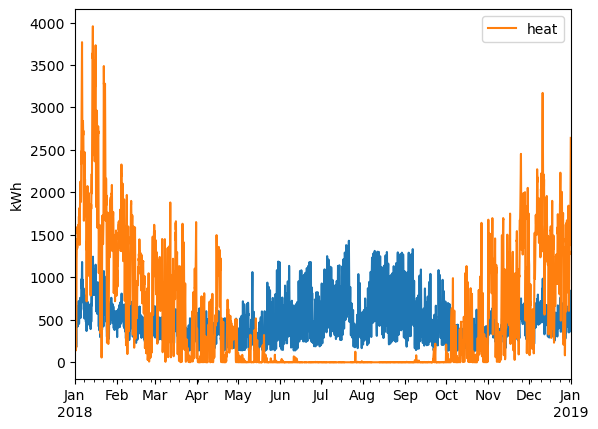

In [4]:
fig, ax = plt.subplots()
res_elec.resample('h').mean().sum(axis=1).plot(ax=ax, label='electricity')
res_heat.resample('h').mean().sum(axis=1).plot(ax=ax, legend=True, label='heat')
ax.set_xlabel('')
ax.set_ylabel('kWh')

In [5]:
total_electrified_data = res_elec.resample('h').mean().sum(axis=1)+res_heat.resample('h').mean().sum(axis=1)/4

In [6]:
total_electrified_data.sum()

5266385.120228281

In [7]:
res_elec.resample('h').mean().sum(axis=1).max()

1430.8057224551974

(0.0, 1450.0)

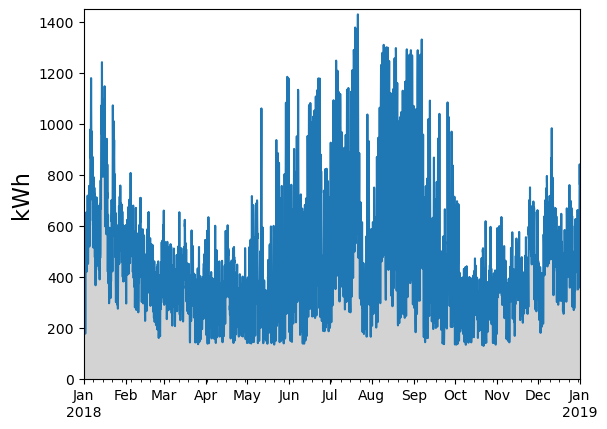

In [8]:
fig, ax = plt.subplots()
res_elec.resample('h').mean().sum(axis=1).plot(ax=ax, label='electricity')
# res_heat.resample('h').mean().sum(axis=1).plot(ax=ax, legend=True, label='heat')
res_elec.resample('h').mean().sum(axis=1).plot.area(ax=ax, lw=0, color='lightgray')
ax.set_xlabel('')
ax.set_ylabel('kWh', fontsize=16)
ax.set_ylim(0, 1450)

Text(0.5, 1.0, 'Average Day')

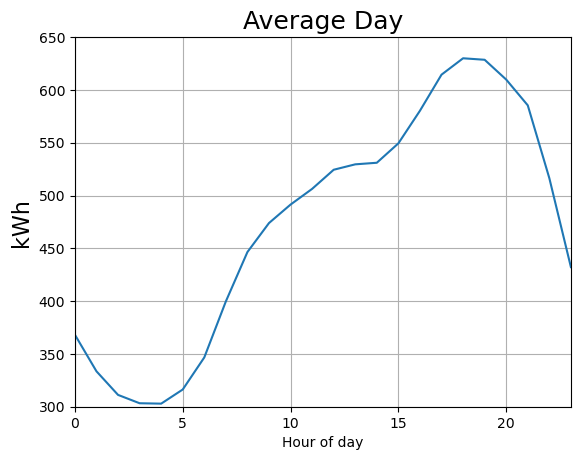

In [9]:
fig, ax = plt.subplots()
res_elec.sum(axis=1).groupby(res_elec.index.hour).mean().plot(ax=ax)
ax.grid(zorder=0)
ax.set_xlim(0,23)
ax.set_ylim(300,650)
ax.set_ylabel("kWh", fontsize=16)
ax.set_xlabel('Hour of day')
ax.set_title('Average Day', size=18)


In [10]:
res_elec.resample('h').mean().sum(axis=1).sum() / (6079*8760*0.18)

0.4315674125864762

In [11]:
weather = pd.read_csv("../data/timeseries/weather_year.csv", parse_dates=True, index_col=0)

In [12]:
weather.ghi.mean() / weather.ghi.max()

0.16817788689562815

In [25]:
res_elec_resampled = res_elec.loc['2018'].resample('h').mean().sum(axis=1)

In [26]:
rooftop_solar_energy = (weather.ghi / weather.ghi.sum() * res_elec_resampled.sum())

<Axes: xlabel='timestamp'>

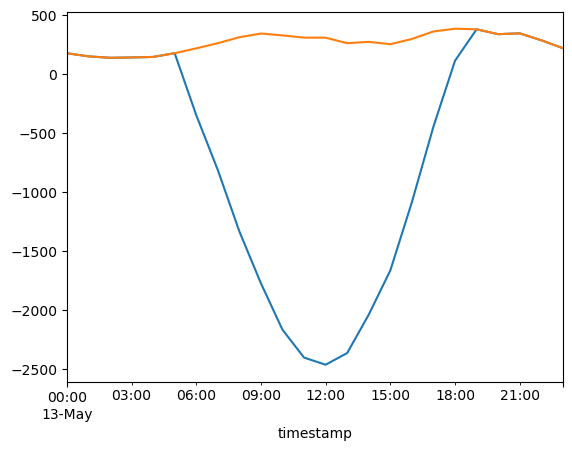

In [36]:
fig, ax = plt.subplots()
time = '2018-05-13'
(res_elec_resampled - rooftop_solar_energy).loc[time].plot(ax=ax)
res_elec_resampled.loc[time].plot(ax=ax)


In [56]:
constant_energy = np.ones(len(rooftop_solar_energy))

In [57]:
constant_energy /= constant_energy.sum()

In [59]:
res_elec_resampled.sum()

4135965.349731396

In [60]:
constant_energy *= res_elec_resampled.sum()

In [63]:
unmet_demand = res_elec_resampled-constant_energy

In [64]:
unmet_demand.where(unmet_demand>0).fillna(0).sum()

794018.7630375257

In [39]:
net_load = (res_elec_resampled - rooftop_solar_energy).to_frame()
net_load.columns = ['net_load']
net_load

,net_load
timestamp,
2018-01-01 00:00:00,734.275500
2018-01-01 01:00:00,319.253001
2018-01-01 02:00:00,206.265092
2018-01-01 03:00:00,200.158683
2018-01-01 04:00:00,214.710827
...,...
2018-12-31 19:00:00,756.661431
2018-12-31 20:00:00,799.025894
2018-12-31 21:00:00,814.918117


In [40]:
retail_price = 0.1129  # $/kWh

In [41]:
net_metering_price = retail_price * 1.0

In [43]:
net_load.where(net_load > 0).sum()

net_load    2.358429e+06
dtype: float64

In [44]:
net_load.where(net_load <0).sum()

net_load   -2.358429e+06
dtype: float64

<Axes: xlabel='timestamp'>

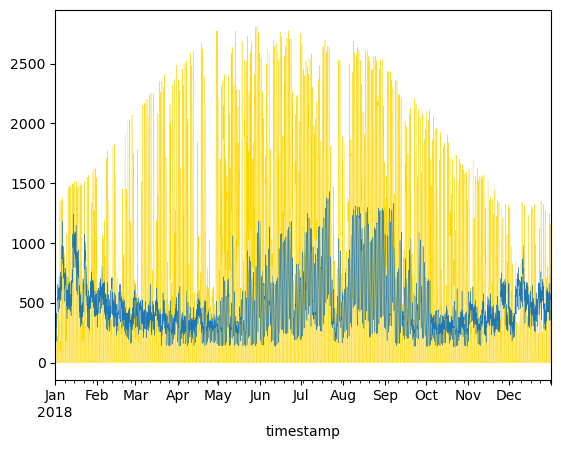

In [53]:
fig, ax = plt.subplots()
(rooftop_solar_energy/rooftop_solar_energy.sum() * res_elec_resampled.sum()).plot(ax=ax, color='gold', lw=0.3)
res_elec_resampled.plot(ax=ax, label='electricity', lw=0.3)

In [125]:
res_elec['single-family_detached']

timestamp
2018-01-01 00:15:00    591.611432
2018-01-01 00:30:00    603.432355
2018-01-01 00:45:00    600.966481
2018-01-01 01:00:00    605.812913
2018-01-01 01:15:00    133.074632
                          ...    
2018-12-31 23:00:00    695.344421
2018-12-31 23:15:00    622.587237
2018-12-31 23:30:00    610.486911
2018-12-31 23:45:00    610.047892
2019-01-01 00:00:00    615.014955
Name: single-family_detached, Length: 35040, dtype: float64

In [29]:
res_elec_resampled.sum()

4135965.349731396

In [30]:
rooftop_solar_energy.sum()

4135965.349731396

<Axes: xlabel='timestamp'>

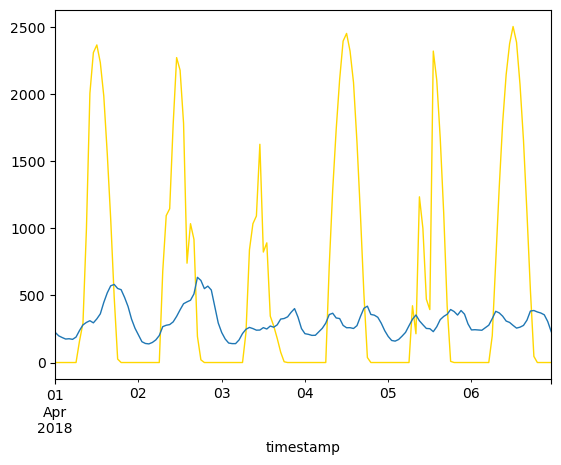

In [69]:
fig, ax = plt.subplots()
(rooftop_solar_energy/rooftop_solar_energy.sum() * res_elec_resampled.sum())[24*30*3:24*32*3].plot(ax=ax, color='gold', lw=1)
res_elec_resampled[24*30*3:24*32*3].plot(ax=ax, label='electricity', lw=1)

In [18]:
def calculate_battery_needs(dataframe):
    df = dataframe.copy()
    # calculate max discharge power
    max_storage_power = df['net_load'].max()
    
    # calculate max storage duration
    df['grp'] = df['net_load'].gt(0).astype(int).diff().abs().cumsum().fillna(0)
    df_grouped = df.groupby(by='grp').sum()
    df_grouped['battery_duration'] = df_grouped['net_load']/max_storage_power
    
    max_storage_duration = df_grouped['battery_duration'].max()
    
    return max_storage_power, max_storage_duration

In [17]:
# rooftop_solar_energy = rooftop_solar_energy/rooftop_solar_energy.sum() * res_elec_resampled.sum()
rooftop_solar_energy = rooftop_solar_energy/rooftop_solar_energy.sum() * res_elec_resampled.sum()

In [18]:
rooftop_solar_energy.max()

2807.397404775099

In [26]:
net_load = rooftop_solar_energy.to_frame()
net_load['net_load'] = res_elec_resampled - net_load['ghi']

In [28]:
calculate_battery_needs(net_load)

(1331.4884367473771, 34.817758877371986)

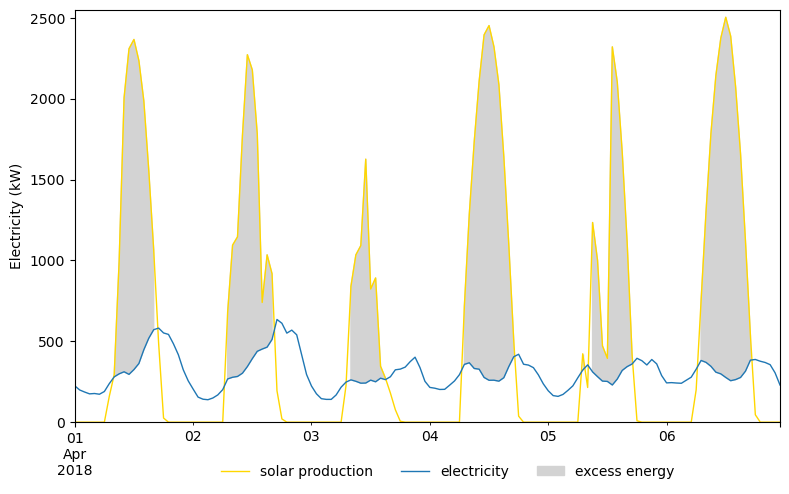

In [123]:
fig, ax = plt.subplots(figsize=(8,5))
start = 24*3*30
end = 24*3*32
rooftop_solar_energy[start:end].plot(ax=ax, color='gold', lw=1, label='solar production')
res_elec_resampled[start:end].plot(ax=ax, label='electricity', lw=1)
ax.fill_between(x=rooftop_solar_energy.index[start:end],
                y1=res_elec_resampled[start:end],
                y2=rooftop_solar_energy[start:end],
                where=rooftop_solar_energy[start:end] >= res_elec_resampled[start:end],
                color='lightgray',
                label='excess energy')
# ax.fill_between(x=rooftop_solar_energy.index[start:end],
#                 y1=0,
#                 y2=res_elec_resampled[start:end],
#                 where=rooftop_solar_energy[start:end]>0)
# ax.fill_between(x=rooftop_solar_energy.index[start:end],
#                 y1=res_elec_resampled[start:end],
#                 y2=rooftop_solar_energy[start:end],
#                 where=rooftop_solar_energy[start:end] < res_elec_resampled[start:end],
#                 color='lightgray')
ax.set_ylabel("Electricity (kW)")
ax.set_xlabel('')
ax.set_ylim(0, 2550)
ax.legend(facecolor='None', framealpha=1, loc=(0.2,-0.15), edgecolor='None', ncols=3)
plt.tight_layout()